In [1]:
import os

fpath = os.getcwd()[:-12]+"\\Fixed_Length_GA"
print(fpath)
os.chdir(fpath)
os.getcwd()

with open("hyperparameters/seedfile.txt", "rb") as f:
        seed_value = int(f.read())

import numpy as np
np.random.seed(seed_value)

import shutil

from tqdm import tqdm

from scipy.linalg import expm, sqrtm, logm

import matplotlib.pyplot as plt
%matplotlib inline

import GA
import physics_functions
import physics_classes
import utils

c:\Users\sofia\Desktop\work_codes\collisional_stateprep\To_share\Fixed_Length_GA


In [3]:
N_levs = 20
Omega_S = 1.
g = 1.
beta_range = 5.
npdtype ="complex128"
beta = 1.

rho0_tuple = ("number", 0)        
model_tc1 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 1., g, beta_range, npdtype)
model_tc05 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 0.5, g, beta_range, npdtype)
model_tc01 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 0.1, g, beta_range, npdtype)
target_tc1 = physics_functions.init_system_state(model_tc1.H_sys, model_tc1.a, model_tc1.a_dag, ("thermal", 1.), [])
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", 1.), [])
target_tc01 = physics_functions.init_system_state(model_tc01.H_sys, model_tc01.a, model_tc01.a_dag, ("thermal", 1.), [])


betax = (beta + beta_range)/(2.*beta_range)
string_tc1 = np.array(5*[betax])
string_tc05 = np.array(10*[betax])
string_tc01 = np.array(50*[betax])
rho_tc1 = model_tc1.evolve(string_tc1)
rho_tc05 = model_tc05.evolve(string_tc05)
rho_tc01 = model_tc01.evolve(string_tc01)
TrD_tc1 = []
for i in range(6):
    TrD_tc1 += [physics_functions.trace_distance(rho_tc1[i], target_tc1)]
TrD_tc05 = []
for i in range(11):
    TrD_tc05 += [physics_functions.trace_distance(rho_tc05[i], target_tc05)]
TrD_tc01 = []
for i in range(51):
    TrD_tc01 += [physics_functions.trace_distance(rho_tc01[i], target_tc01)]

sol_tc1 = [TrD_tc1[0]] + [-np.loadtxt("results/genericAncillas_n0tobeta1_tc1Nc" + str(Nc) +"/history")[-1] for Nc in [1, 2, 3, 4, 5]]
sol_tc05 = [TrD_tc05[0]] +[-np.loadtxt("results/genericAncillas_n0tobeta1_tc05Nc" + str(Nc) +"/history")[-1] for Nc in [2, 4, 6, 8, 10]]
sol_tc01 = [TrD_tc01[0]] +[-np.loadtxt("results/genericAncillas_n0tobeta1_tc01Nc" + str(Nc) +"/history")[-1] for Nc in [10, 20, 30, 40, 50]]

print(sol_tc1)
print(sol_tc05)
print(sol_tc01)

[np.float64(0.367879), np.float64(0.135335), np.float64(0.049787), np.float64(0.0250605), np.float64(0.0181255), np.float64(0.010797)]
[np.float64(0.367879), np.float64(0.0547465), np.float64(0.0227195), np.float64(0.013669), np.float64(0.0083695), np.float64(0.009612)]
[np.float64(0.367879), np.float64(0.2726635), np.float64(0.1876495), np.float64(0.1126085), np.float64(0.0507875), np.float64(0.0074105)]


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 [Text(0, -0.05, '−0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.10000000000000002, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25000000000000006, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40')])

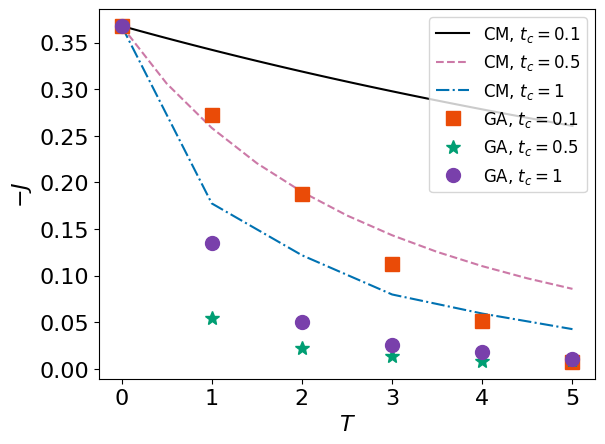

In [ ]:
plt.plot([0.1*n_c for n_c in range(len(TrD_tc01))], TrD_tc01, "-", label = "CM, $t_c=0.1$", color = "#000000")
plt.plot([0.5*n_c for n_c in range(len(TrD_tc05))], TrD_tc05, "--", label = "CM, $t_c=0.5$", color = "#cc79a7")
plt.plot([n_c for n_c in range(len(TrD_tc1))], TrD_tc1, "-.", label = "CM, $t_c=1$", color = "#0072b2")

plt.plot([n_c for n_c in range(len(sol_tc01))], sol_tc01, "s", label = "GA, $t_c=0.1$", color = "#ea4b07", markersize=10)
plt.plot([n_c for n_c in range(len(sol_tc05))], sol_tc05, "*", label = "GA, $t_c=0.5$", color = "#009e73", markersize=10)
plt.plot([n_c for n_c in range(len(sol_tc1))], sol_tc1, "o", label = "GA, $t_c=1$", color = "#7940ab", markersize=10)
plt.legend(loc='upper right', fontsize=12)

plt.xlabel(r"$T$", fontsize=16)
plt.ylabel(r"$-J$", fontsize=16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.savefig("figure_thermalization1.pdf", bbox_inches="tight")